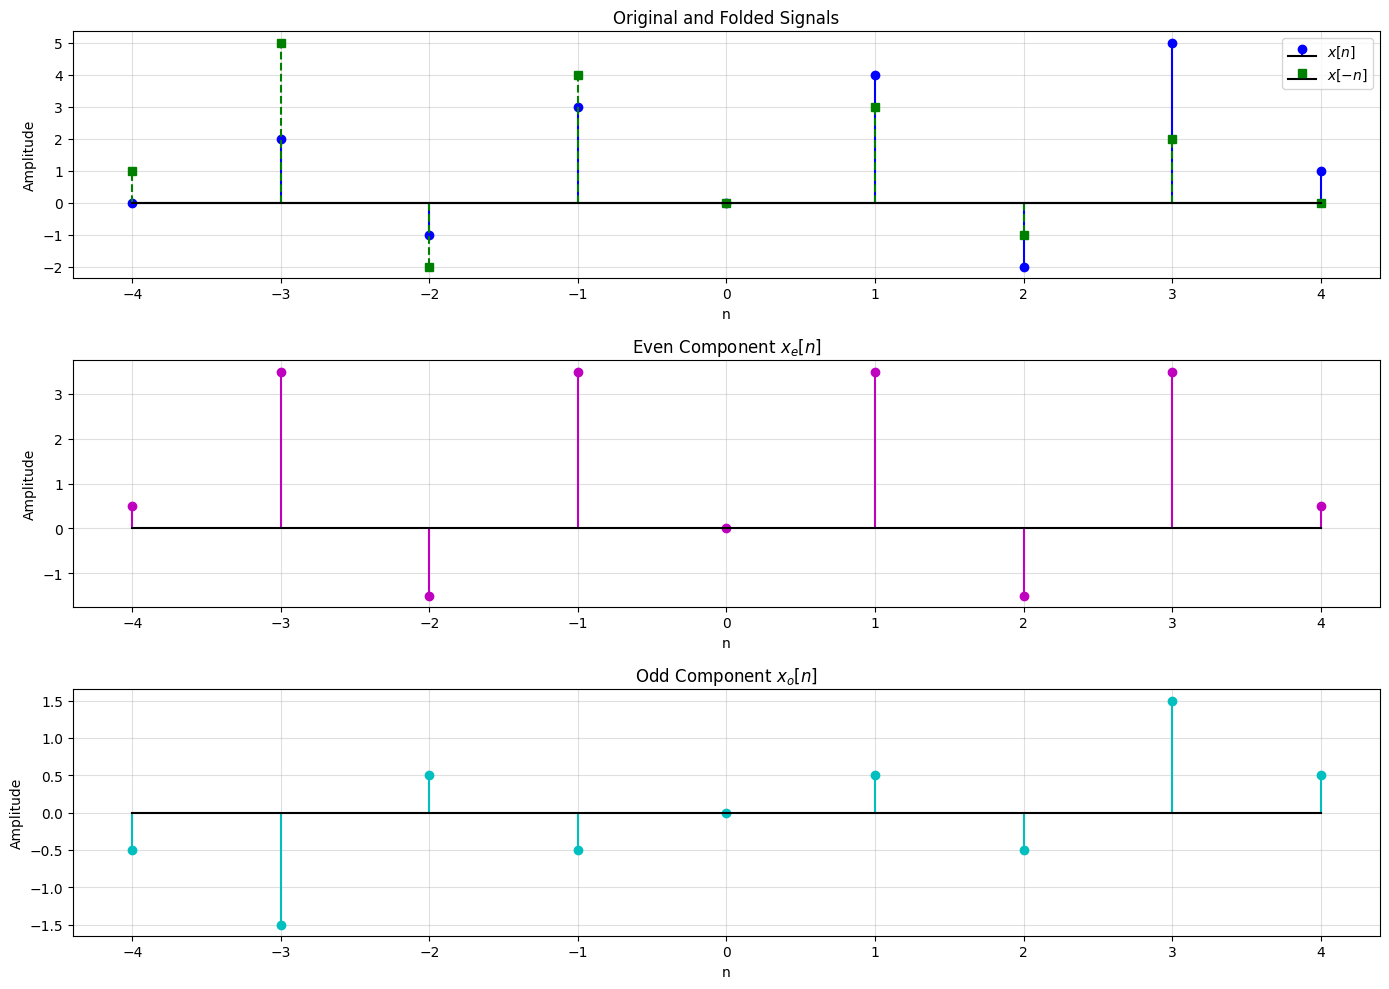

=== Verification ===
Reconstruction error: 0.00e+00
Even part symmetric? True
Odd part antisymmetric? True


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ==== Define sequence ====
x = np.array([0, 2, -1, 3, 0, 4, -2, 5, 1], dtype=float)

# ==== Indices centered at 0 ====
L = len(x)
n = np.arange(-(L//2), L//2 + 1) if L % 2 == 1 else np.arange(-L//2, L//2)

# ==== Folding (time reversal) ====
x_folded = np.array([x[np.where(n == -k)][0] if -k in n else 0 for k in n])

# ==== Even and Odd components ====
x_even = 0.5 * (x + x_folded)
x_odd  = 0.5 * (x - x_folded)

# ==== Plotting ====
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.stem(n, x, linefmt='b-', markerfmt='bo', basefmt='k-', label="$x[n]$")
plt.stem(n, x_folded, linefmt='g--', markerfmt='gs', basefmt='k-', label="$x[-n]$")
plt.title("Original and Folded Signals")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True, alpha=0.4)

plt.subplot(3, 1, 2)
plt.stem(n, x_even, linefmt='m-', markerfmt='mo', basefmt='k-')
plt.title("Even Component $x_e[n]$")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid(True, alpha=0.4)

plt.subplot(3, 1, 3)
plt.stem(n, x_odd, linefmt='c-', markerfmt='co', basefmt='k-')
plt.title("Odd Component $x_o[n]$")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid(True, alpha=0.4)

plt.tight_layout()
plt.show()

# ==== Simple Verification ====
x_reconstructed = x_even + x_odd
error = np.max(np.abs(x - x_reconstructed))

print("=== Verification ===")
print(f"Reconstruction error: {error:.2e}")
print(f"Even part symmetric? {np.allclose(x_even, x_even[::-1])}")
print(f"Odd part antisymmetric? {np.allclose(x_odd, -x_odd[::-1])}")
